In [1]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import os

#all models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

#accuracy measures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [7]:
#set paths
path = os.path.join(os.getcwd(), 'dataset')
file_path = os.path.join(path, 'final_df.xlsx')
file_path

'/Users/mustakimsunny/Desktop/ML/fantasy_game/dataset/final_df.xlsx'

In [8]:
#read files and see data types
final_data = pd.read_excel(file_path)
final_data.dtypes

match_id                  int64
name                     object
matchTime                object
total_contest_given     float64
Total Entry Amount      float64
TotalSeat               float64
TotalWinningAMount      float64
TotalTeamCapacity       float64
ProfitMergin            float64
TotalContestPerMatch      int64
Unnamed: 10             float64
dtype: object

In [9]:
#drop unnecessary columns
final_data = final_data.drop(['match_id','TotalContestPerMatch', 'Unnamed: 10'], axis=1)

In [10]:
final_data.dtypes

name                    object
matchTime               object
total_contest_given    float64
Total Entry Amount     float64
TotalSeat              float64
TotalWinningAMount     float64
TotalTeamCapacity      float64
ProfitMergin           float64
dtype: object

In [11]:
#convert matchTime to datetime
final_data['matchTime'] = pd.to_datetime(final_data['matchTime'])

In [12]:
final_data.dtypes

name                           object
matchTime              datetime64[ns]
total_contest_given           float64
Total Entry Amount            float64
TotalSeat                     float64
TotalWinningAMount            float64
TotalTeamCapacity             float64
ProfitMergin                  float64
dtype: object

In [13]:
#list of teams with their ICC rank value
teams_dict = {'australia':15, 'india':18, 'bangladesh':20, 'srilanka':13, 'southafrica':16, 'pakistan':14, 
            'zimbabwe':9,'newzealand':17, 'westindies':12, 'england':19, 'afghanistan':11, 'ireland':10, 
            'netherlands':8,'oman':7, 'scotland':6, 'nepal':5, 'namibia':4, 'uae':3, 'usa':2, 'papuanewguinea':1
             }

teams_t20={'Pakistan': '1', 'Australia': '2', 'England': '3', 'India': '4', 'South Africa': '5', 'New Zealand': '6', 
           'Afghanistan': '7', 'Sri Lanka': '8', 'Bangladesh': '9', 'West Indies': '10', 'Zimbabwe': '11', 
           'Ireland': '12', 'Scotland': '13', 'UAE': '14', 'Nepal': '15', 'Netherlands': '16', 'PNG': '17', 
           'Oman': '18', 'Namibia': '19', 'Singapore': '20', 'Qatar': '21', 'Canada': '22', 'Hong Kong': '23', 
           'Jersey': '24', 'Saudi Arabia': '25', 'Italy': '26', 'Kuwait': '27', 'Kenya': '28', 'Denmark': '29', 
           'Bermuda': '30', 'Malaysia': '31', 'Germany': '32', 'USA': '33', 'Uganda': '34', 'Botswana': '35', 
           'Ghana': '36', 'Norway': '37', 'Austria': '38', 'Guernsey': '39', 'Romania': '40', 'Nigeria': '41', 
           'Sweden': '42', 'Spain': '43', 'Tanzania': '44', 'Cayman Islands': '45', 'Philippines': '46', 
           'Bahrain': '47', 'Argentina': '48', 'France': '49', 'Vanuatu': '50', 'Belize': '51', 'Luxembourg': '52', 
           'Malawi': '53', 'Peru': '54', 'Fiji': '55', 'Panama': '56', 'Belgium': '57', 'Samoa': '58', 'Japan': '59',
           'Costa Rica': '60', 'Mexico': '61', 'Hungary': '62', 'Bulgaria': '63', 'Czech Republic': '64', 
           'Israel': '65', 'Thailand': '66', 'Portugal': '67', 'Finland': '68', 'South Korea': '69', 
           'Isle of Man': '70', 'Chile': '71', 'Bhutan': '72', 'Mozambique': '73', 'Sierra Leone': '74', 
           'Brazil': '75', 'Maldives': '76', 'St Helena': '77', 'Malta': '78', 'Myanmar': '79', 
           'Indonesia': '80', 'China': '81', 'Gambia': '82', 'Gibraltar': '83', 'Swaziland': '84', 
           'Rwanda': '85', 'Lesotho': '86'}

#match weight calculation
def match_weight(team1, team2):
    if team1 in teams_dict and team2 in teams_dict:
        normalized_sum = teams_dict[team1]/20 + teams_dict[team2]/20
        weight = normalized_sum/2
        return weight
    else:
        return None

#for future extension
def team_points(team1, team2):
    #team points to calculate aggregate weight
    pass
    
    
    

In [14]:
#iterate over all the matches and calculate their corresponding hype value 
match_hype = []
all_teams = []
for teams in final_data['name']:
    teams= teams.replace('vs', ',')
    teams = teams.replace(" ", '')
    team1,team2 = teams.lower().split(',')
    #print(team1,team2)
    all_teams.append(team1)
    all_teams.append(team2)
    weight = match_weight(team1,team2)
    match_hype.append(weight)


    

In [15]:
print(match_weight('australia', 'india'))

0.825


In [16]:
#next action item
#1. get all the ranks for each of the teams
#2. get their hypes
#3. convert into pandas df and add it to the main dataset
#4. data preprocessing as usual

In [17]:
other_teams = []
#for team in all_teams:
#    if team not in teams_dict:
#        other_teams
#        print(team)

In [18]:
international_odi_teams = []
all_other_t20_teams = []
for team in list(set(all_teams)):
    if team not in teams_dict:
        all_other_t20_teams.append(team)
    if team in teams_dict:
        international_odi_teams.append(team)
    

In [19]:
x = {}
i = 0
odi_team_df = pd.DataFrame()
for teams in final_data['name']:
    i += 1
    teams= teams.replace('vs', ',')
    teams = teams.replace(" ", '')
    team1,team2 = teams.lower().split(',')
    if team1 in international_odi_teams and team2 in international_odi_teams:
        #print(team1, team2)
        weight = match_weight(team1, team2)
        #print(weight)
        for key, val in final_data.iloc[i-1].items():
            x[key] = val
        x['hype'] = match_weight(team1, team2)
        odi_team_df = odi_team_df.append(x, ignore_index=True)
        #print(final_data.iloc[i-1])
        
        
        


In [20]:
odi_team_df.iloc[:30]

ProfitMergin  Total Entry Amount  TotalSeat  TotalTeamCapacity  \
0         -370.0              1630.0      110.0              600.0   
1         -660.0               840.0       42.0              300.0   
2         -210.0               590.0       59.0              300.0   
3         -250.0               550.0       55.0              300.0   
4         -680.0               820.0       41.0              300.0   
5         -460.0               540.0       54.0              300.0   
6         -590.0               410.0       41.0              300.0   
7         -945.0              1305.0      100.0              600.0   
8        -1040.0              1210.0       94.0              600.0   
9         -280.0              1970.0      153.0              700.0   
10        -270.0              1230.0       82.0              300.0   
11        -215.0              2035.0      157.0              600.0   
12        -255.0              1245.0       83.0              300.0   
13        -315.0              1185.0       79.0              300.0   
14          15.0              2265.0      174.0              700.0   
15          60.0              1560.0      104.0              300.0   
16         100.0              2350.0      186.0              600.0   
17          90.0              1590.0      106.0              300.0   
18         150.0               900.0       90.0              300.0   
19        -150.0              1350.0       90.0              300.0   
20         290.0              1040.0      104.0              300.0   
21          10.0               760.0       76.0              300.0   
22        1730.0              4150.0      245.0              345.0   
23        2685.0              5455.0      409.0              725.0   
24         140.0              2390.0      188.0              600.0   
25        2805.0              5675.0      444.0             1125.0   
26        2355.0              5225.0      394.0             1125.0   
27        4170.0              7690.0      600.0             1075.0   
28        3245.0              6765.0      517.0             1225.0   
29        1295.0              4815.0      350.0             1275.0   

    TotalWinningAMount   hype           matchTime                        name  \
0               2000.0  0.725 2019-03-22 17:00:00       Pakistan vs Australia   
1               1500.0  0.725 2019-03-22 22:00:00   South Africa vs Sri Lanka   
2                800.0  0.725 2019-03-24 17:00:00       Pakistan vs Australia   
3                800.0  0.725 2019-03-24 18:30:00   South Africa vs Sri Lanka   
4               1500.0  0.725 2019-03-27 17:00:00       Pakistan vs Australia   
5               1000.0  0.725 2019-03-29 17:00:00       Pakistan vs Australia   
6               1000.0  0.725 2019-03-31 17:00:00       Pakistan vs Australia   
7               2250.0  0.550 2019-05-05 15:45:00      Ireland vs West Indies   
8               2250.0  0.825 2019-05-05 19:30:00         England vs Pakistan   
9               2250.0  0.800 2019-05-07 15:45:00   West Indies vs Bangladesh   
10              1500.0  0.825 2019-05-08 18:00:00         England vs Pakistan   
11              2250.0  0.750 2019-05-09 15:45:00       Ireland vs Bangladesh   
12              1500.0  0.550 2019-05-11 15:45:00      Ireland vs West Indies   
13              1500.0  0.825 2019-05-11 16:00:00         England vs Pakistan   
14              2250.0  0.800 2019-05-13 15:45:00   West Indies vs Bangladesh   
15              1500.0  0.825 2019-05-14 18:00:00         England vs Pakistan   
16              2250.0  0.750 2019-05-15 15:45:00       Ireland vs Bangladesh   
17              1500.0  0.825 2019-05-17 18:00:00         England vs Pakistan   
18               750.0  0.475 2019-05-18 16:00:00       Scotland vs Sri Lanka   
19              1500.0  0.825 2019-05-19 16:00:00         England vs Pakistan   
20               750.0  0.525 2019-05-21 15:45:00      Ireland vs Afghanistan   
21               750.0  0.475 2019-05-21 16:00:00  

In [21]:
corr_matrix = odi_team_df.corr()
print(corr_matrix['total_contest_given'].sort_values(ascending=False))

total_contest_given    1.000000
TotalWinningAMount     0.848187
Total Entry Amount     0.831589
TotalSeat              0.722282
ProfitMergin           0.397696
TotalTeamCapacity      0.321607
hype                   0.099936
Name: total_contest_given, dtype: float64


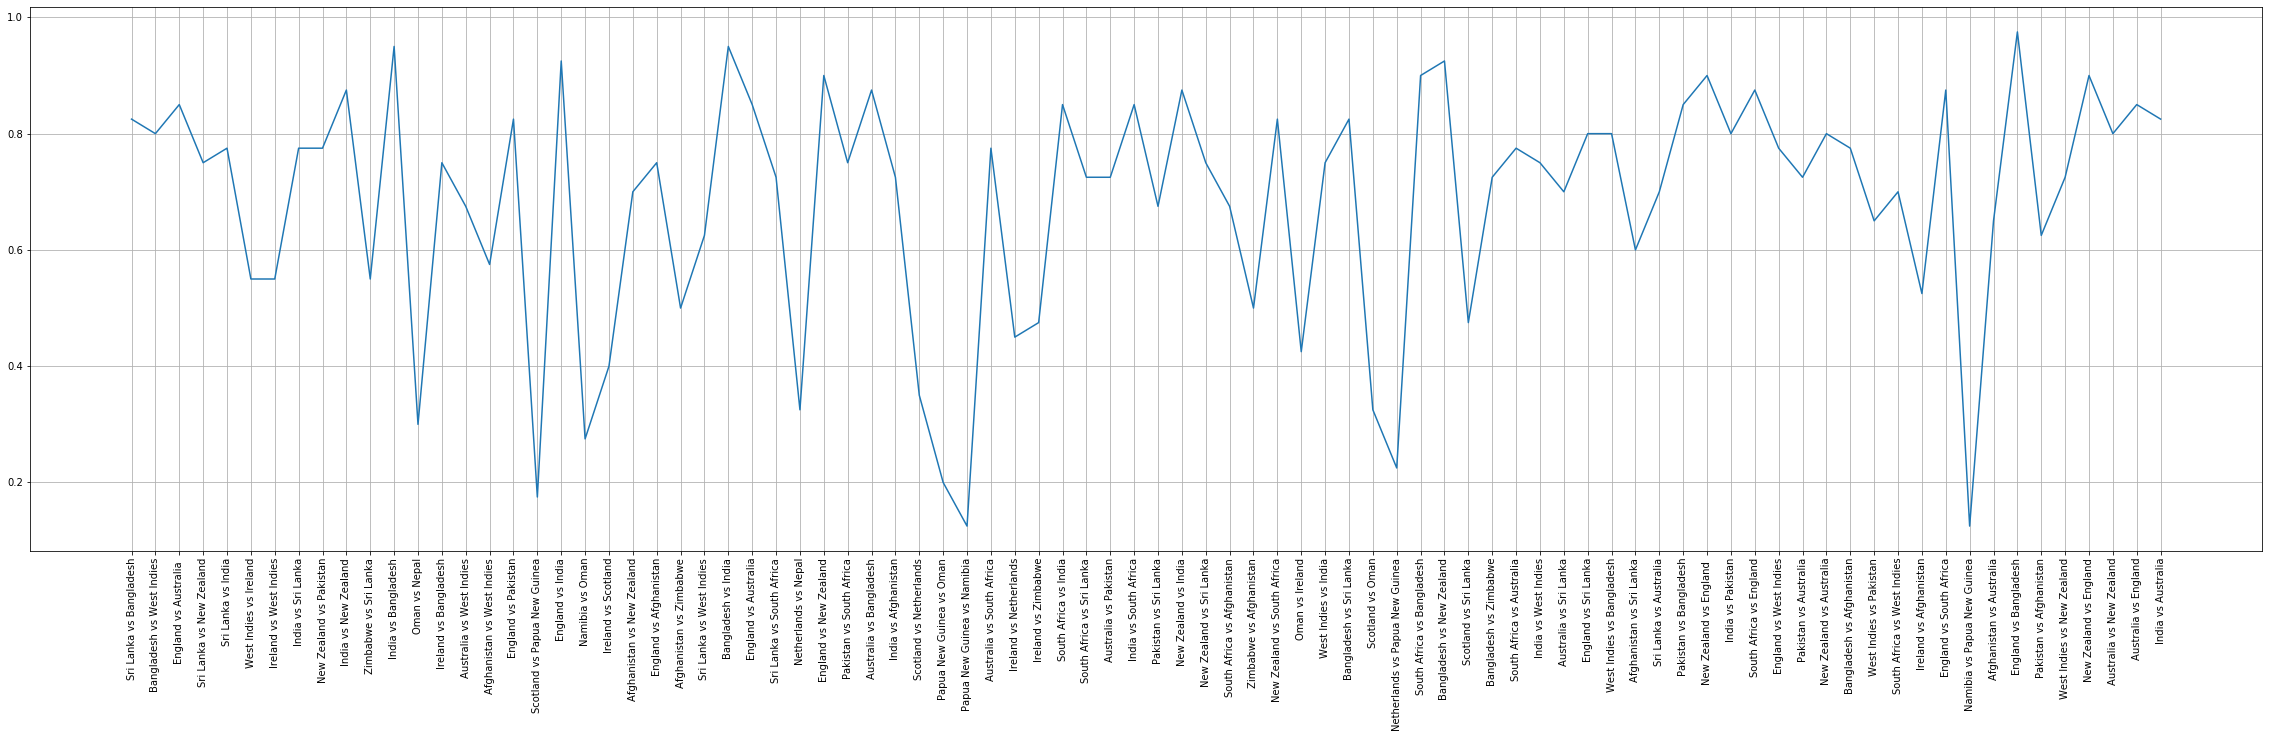

In [22]:
p = []
y = []
unique_odi_teams = list(set(odi_team_df['name']))
for vals in unique_odi_teams:
    #print(str(vals))
    p.append(str(vals))
    #print('Match: ', str(vals))
    #y.append(sum(odi_team_df[odi_team_df.name == str(vals)].ProfitMergin)/len(odi_team_df[odi_team_df.name == str(vals)].ProfitMergin))
    #y.append(sum(odi_team_df[odi_team_df.name == str(vals)].total_contest_given)/len(odi_team_df[odi_team_df.name == str(vals)].total_contest_given))
    y.append(sum(odi_team_df[odi_team_df.name == str(vals)].hype)/len(odi_team_df[odi_team_df.name == str(vals)].hype))
    

plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
plt.plot(p,y)
plt.grid()

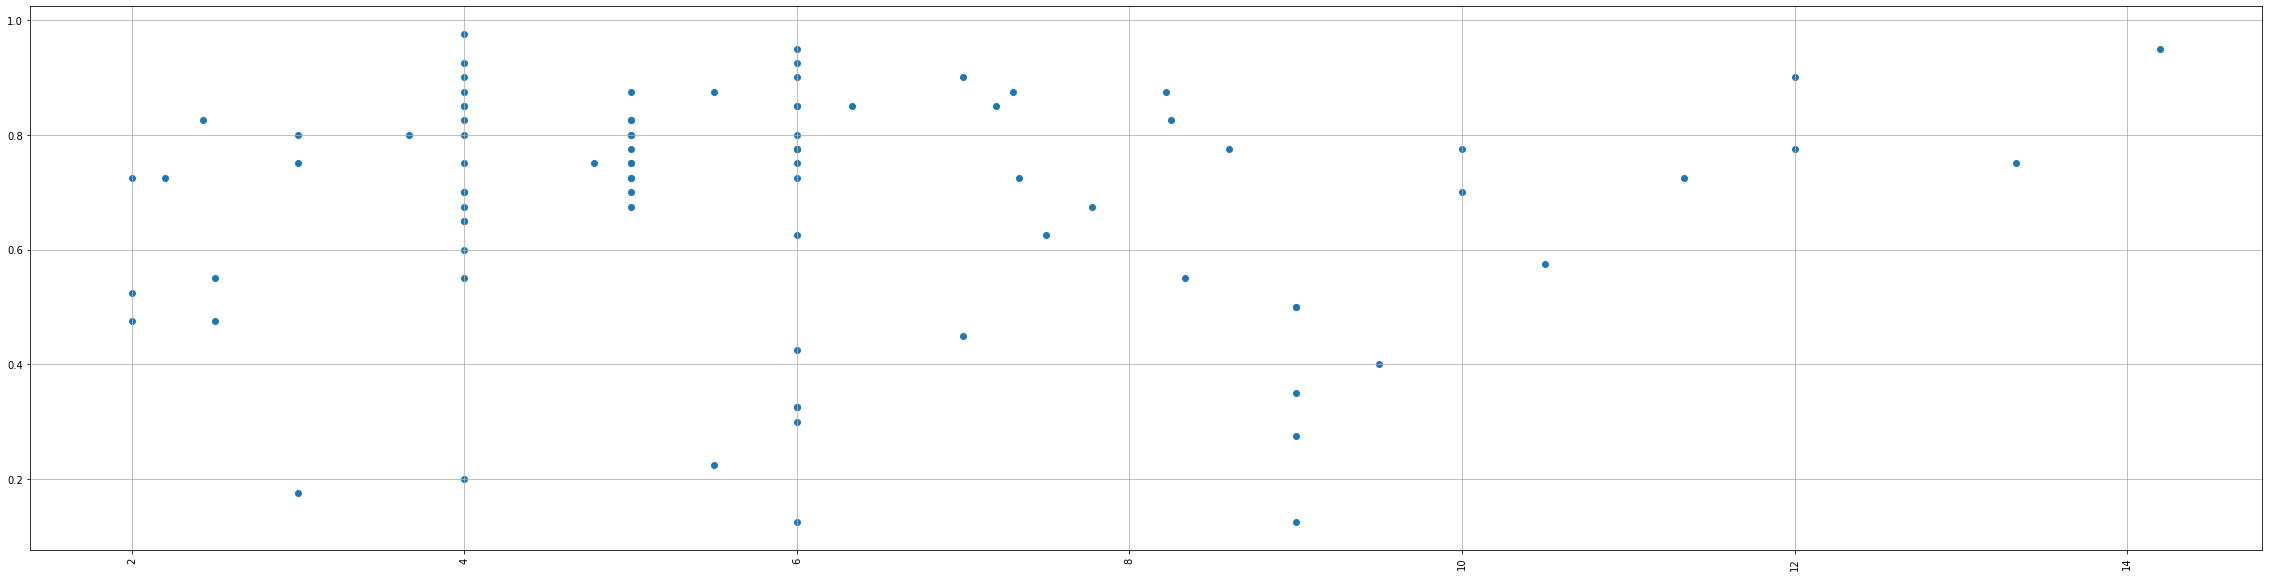

In [23]:
x = []
y = []
unique_odi_teams = list(set(odi_team_df['name']))
for vals in unique_odi_teams:
    x.append(sum(odi_team_df[odi_team_df.name == str(vals)].total_contest_given)/len(odi_team_df[odi_team_df.name == str(vals)].total_contest_given))
    #print('x: ', sum(odi_team_df[odi_team_df.name == str(vals)].total_contest_given)/len(odi_team_df[odi_team_df.name == str(vals)].total_contest_given))
    y.append(sum(odi_team_df[odi_team_df.name == str(vals)].hype)/len(odi_team_df[odi_team_df.name == str(vals)].hype))
    #print('y: ', sum(odi_team_df[odi_team_df.name == str(vals)].hype)/len(odi_team_df[odi_team_df.name == str(vals)].hype))

plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
plt.scatter(x,y)
plt.grid()

    
    

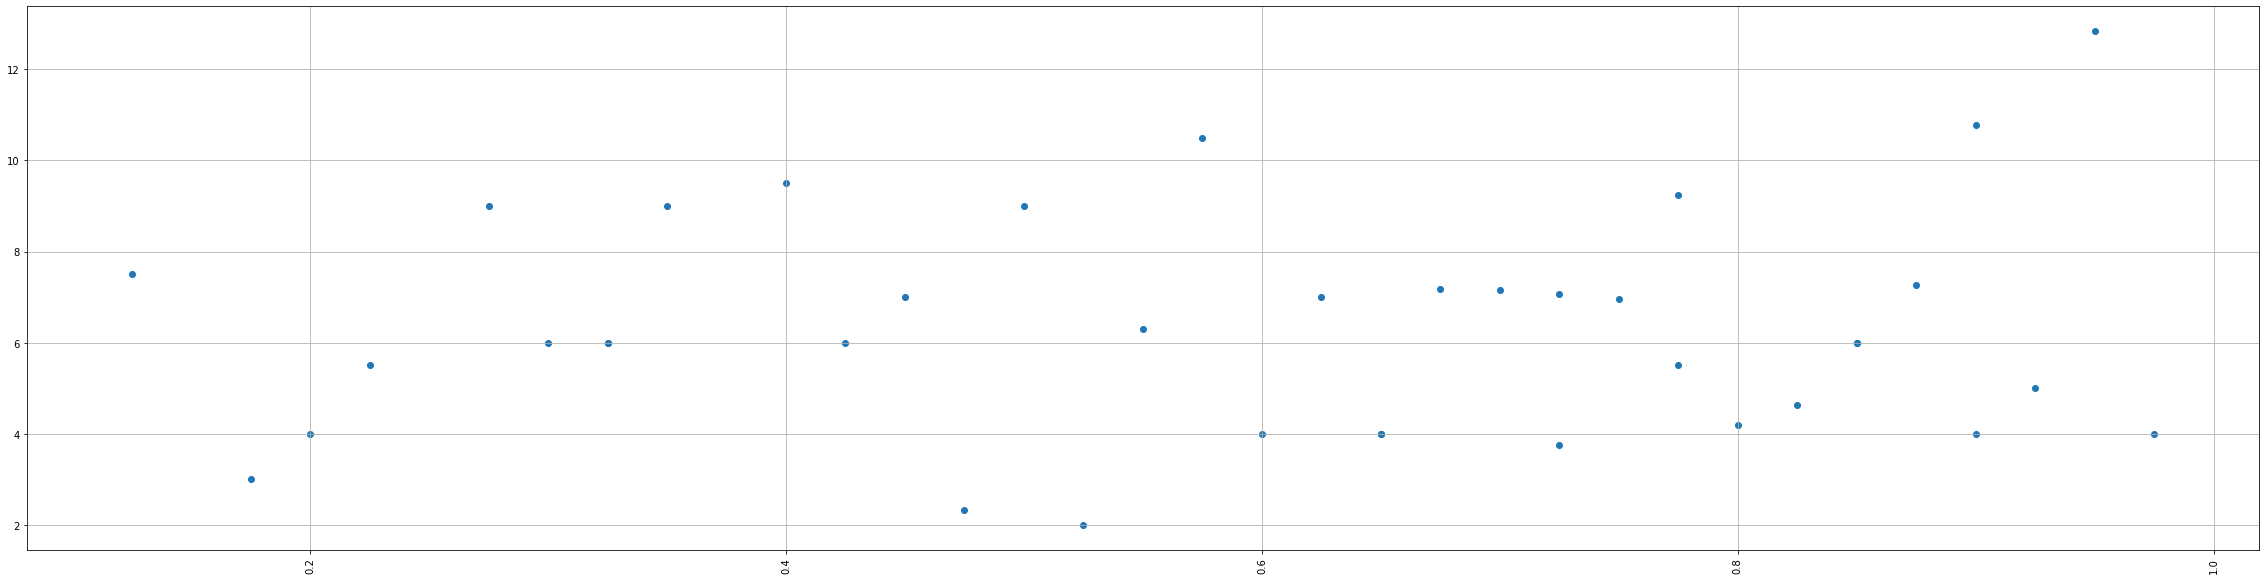

In [24]:
x = []
y = []
for hype in odi_team_df['hype']:
    #print('hype: ', hype)
    x.append(hype)
x = list(set(x))
for hype in x:
    #print(sum(odi_team_df[odi_team_df.hype == hype].total_contest_given)/len(odi_team_df[odi_team_df.hype == hype].total_contest_given))
    y.append(sum(odi_team_df[odi_team_df.hype == hype].total_contest_given)/len(odi_team_df[odi_team_df.hype == hype].total_contest_given))
    
    
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
plt.scatter(x,y)
plt.grid()

In [25]:
#create another dataframe to experiment on
df_initial_model = final_data

#only the ODI team data with Hype column added, this gives a better accuracy but 
#need more testing after all the matches have their hype
#df_initial_model = odi_team_df

#just to test 213 rows to cross check with the ODI team data with no hype col added
#this one gives over 90% accuracy but could be overfitted 
#df_initial_model = final_data[:213]

df_initial_model


name           matchTime  \
0                                Pakistan vs Australia 2019-03-22 17:00:00   
1                            South Africa vs Sri Lanka 2019-03-22 22:00:00   
2    Chennai Super Kings vs Royal Challengers Banga... 2019-03-23 20:30:00   
3         Kolkata Knight Riders vs Sunrisers Hyderabad 2019-03-24 16:30:00   
4                                Pakistan vs Australia 2019-03-24 17:00:00   
..                                                 ...                 ...   
642                    Pakistan U19 vs New Zealand U19 2020-02-08 15:16:00   
643                        India U19 vs Bangladesh U19 2020-02-09 14:00:00   
644                     Australia Women vs India Women 2020-02-12 08:40:00   
645            Australia Womens vs South Africa Womens 2020-02-18 06:00:00   
646               Bangladesh Womens vs Pakistan Womens 2020-02-20 06:00:00   

     total_contest_given  Total Entry Amount  TotalSeat  TotalWinningAMount  \
0                    3.0              1630.0      110.0              2000.0   
1                    2.0               840.0       42.0              1500.0   
2                    2.0              1360.0       68.0              1500.0   
3                    2.0              1280.0       64.0              1500.0   
4                    2.0               590.0       59.0               800.0   
..                   ...                 ...        ...                 ...   
642                  6.0              9327.0      270.0              8975.0   
643                  7.0             15871.0      668.0             16485.0   
644                  6.0             12795.0      460.0             11205.0   
645                  6.0             16565.0      395.0             14545.0   
646                  6.0             15769.0      382.0             15285.0   

     TotalTeamCapacity  ProfitMergin  
0                600.0        -370.0  
1                300.0        -660.0  
2                300.0        -140.0  
3                300.0        -220.0  
4                300.0        -210.0  
..                 ...           ...  
642              301.0         352.0  
643             1055.0        -614.0  
644              460.0        1590.0  
645              395.0        2020.0  
646              410.0         484.0  

[647 rows x 8 columns]

In [26]:
#check correlation 
corr_matrix = df_initial_model.corr()
print(corr_matrix['total_contest_given'].sort_values(ascending=False))

total_contest_given    1.000000
TotalWinningAMount     0.851854
Total Entry Amount     0.831936
TotalSeat              0.696287
ProfitMergin           0.455571
TotalTeamCapacity     -0.005903
Name: total_contest_given, dtype: float64


In [27]:
#drop columns that are not intended to be used for now
df_initial_model = df_initial_model.drop(['name', 'matchTime'], axis=1)

In [28]:
#see empty rows
sample_incomplete_rows = df_initial_model[df_initial_model.isnull().any(axis=1)]
sample_incomplete_rows

total_contest_given  Total Entry Amount  TotalSeat  TotalWinningAMount  \
84                   1.0                 NaN        NaN                 NaN   
85                   1.0                 NaN        NaN                 NaN   
86                   1.0                 NaN        NaN                 NaN   
88                   1.0                 NaN        NaN                 NaN   
89                   1.0                 NaN        NaN                 NaN   
90                   1.0                 NaN        NaN                 NaN   
552                  NaN                 8.0    15717.0               631.0   
601                  NaN                 5.0    14890.0               355.0   
641                  NaN                 8.0    24917.0               752.0   

     TotalTeamCapacity  ProfitMergin  
84                 NaN           NaN  
85                 NaN           NaN  
86                 NaN           NaN  
88                 NaN           NaN  
89                 NaN           NaN  
90                 NaN           NaN  
552            13590.0         631.0  
601            13380.0         355.0  
641            22855.0         785.0

In [29]:
# fill missing values with mean column values
df_initial_model.fillna(df_initial_model.mean(), inplace=True)

#or drop all the missing rows which hits the accuracy quite a lot
#df_initial_model.dropna(inplace= True)


In [30]:
#creating a pipeline for scaling and normalization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])



In [31]:
#train test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_initial_model, test_size=0.2, random_state=42)

In [32]:
# X and y set split
X_train, X_test = train_set.drop("total_contest_given", axis=1),test_set.drop("total_contest_given", axis=1)
y_train, y_test = train_set["total_contest_given"], test_set["total_contest_given"]

#convert target col to int
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

print(y_test)

634     7
220     3
426    12
428     2
72      3
       ..
513    10
374     8
443    13
244     9
599     7
Name: total_contest_given, Length: 130, dtype: int64


In [33]:
#X_train, X_test = num_pipeline.fit_transform(X_train),num_pipeline.fit_transform(X_test)

#y_train = np.array(y_train)
#y_test = np.array(y_test)

#y_train = y_train.reshape(-1,1)  
#y_test = y_test.reshape(-1,1)

#y_train, y_test = num_pipeline.fit_transform(y_train), num_pipeline.fit_transform(y_test) 
#print(y_test)

In [34]:
#from sklearn import preprocessing
#from sklearn import utils

#lab_enc = preprocessing.LabelEncoder()
#y_train = lab_enc.fit_transform(y_train)
#y_test = lab_enc.fit_transform(y_test)



In [69]:
#select model, fit and predict
#then measure different accuracy score for each of 'em
predicted_vals = []
algorithms = [LinearRegression(), SVC(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestRegressor()]
for algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_vals.append(y_pred)
    print('Model: ', model)
    print('\n')
    print('mean squared error: ', mean_squared_error(y_test, y_pred))
    print('explained variance score: ', explained_variance_score(y_test, y_pred))
    print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
    print('median squared error: ', median_absolute_error(y_test, y_pred))
    print('r2 score: ', r2_score(y_test, y_pred))
    
    print('---------------------------------------------')
    




    

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean squared error:  3.5648445300035165
explained variance score:  0.7178320618840064
mean absolute error:  1.352953347736687
median squared error:  0.8137664908729256
r2 score:  0.7175016878048053
---------------------------------------------
Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


mean squared error:  3.723076923076923
explained variance score:  0.7058815254547246
mean absolute error:  1.1076923076923078
median squared error:  1.0
r2 score:  0.7049624638353942
---------------------------------------------
Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   mult

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


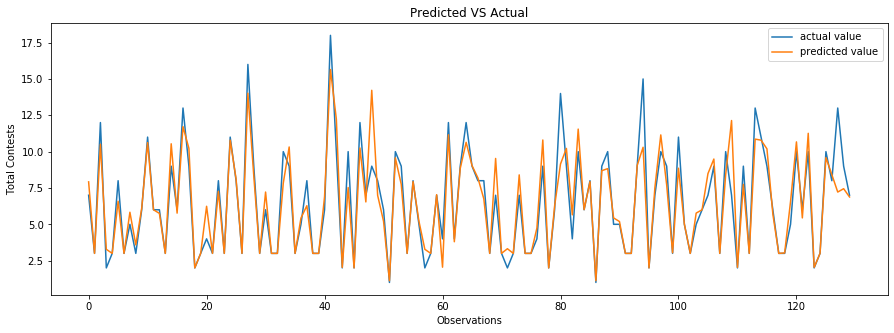

In [55]:
x = []
for i in range(130):
    x.append(i)
y1 = y_test
y2 = predicted_vals[5]

plt.figure(figsize=(15,5))
plt.plot(x, y1, label = "actual value")
plt.plot(x, y2, label = "predicted value")

plt.xlabel('Observations')
plt.ylabel('Total Contests')
plt.title('Predicted VS Actual')
plt.legend()

plt.show()


In [71]:
import numpy as np
 
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(random_state=42)
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="r2", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


In [72]:
forest_scores

array([0.72111125, 0.82484031, 0.70694215, 0.8234935 , 0.83156302,
       0.74336745, 0.71365426, 0.82684372, 0.72374829, 0.59165359])

In [118]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9,10], [11,12],[13,14],[15,16],[17,18],[19,20]]) # create an array
y = np.array([1, 2, 3, 4])

In [198]:
#KFold(12, n_folds=3)

kf = KFold(n_splits = 5, shuffle = True, random_state = 3)
kf.get_n_splits(X)

5

In [199]:
for train_index, test_index in kf.split(X):
    print('Train: ', train_index, 'Test: ', test_index)
    #print(X[train_index])
    #print(X[test_index])
    


Train:  [0 1 2 3 6 7 8 9] Test:  [4 5]
Train:  [0 3 4 5 6 7 8 9] Test:  [1 2]
Train:  [0 1 2 3 4 5 7 8] Test:  [6 9]
Train:  [1 2 3 4 5 6 8 9] Test:  [0 7]
Train:  [0 1 2 4 5 6 7 9] Test:  [3 8]


In [192]:
X[test_index]

array([[17, 18],
       [19, 20]])

In [208]:
import numpy as np
from sklearn.model_selection import KFold

x = [1,2,3,4,5,6,7,8,9,10,11,12]
kf = KFold(10)

for train_index, test_index in kf.split(x):
    print(train_index, test_index)

[ 2  3  4  5  6  7  8  9 10 11] [0 1]
[ 0  1  4  5  6  7  8  9 10 11] [2 3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


In [220]:
data = [['Mobile', 10], ['Mobile', 10], ['Mobile', 10],['Mobile', 10],['Mobile', 10],['Mobile', 10],['Mobile', 10],['Mobile', 10],['Mobile', 10],['Mobile', 10]] 
df = pd.DataFrame(data, columns = ['Name', 'Age']) 

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

for train_index, test_index in split.split(df, df['Age']):
    print(train_index, test_index)
    


[7 1 8 0 2 4 9 5] [3 6]
[1 6 8 4 0 3 9 5] [7 2]
[9 5 3 4 6 2 7 1] [0 8]
[1 9 4 0 3 7 6 5] [8 2]
[6 2 5 8 4 0 9 7] [3 1]
[7 6 2 0 4 9 8 1] [5 3]
[2 8 5 0 6 7 9 3] [4 1]
[9 8 2 6 3 5 4 1] [7 0]
[7 5 4 3 9 2 0 1] [6 8]
[1 9 8 7 3 5 4 6] [2 0]


In [213]:
df

Name  Age
0     1    2
1     3    4
2     5    6
3     7    8
4     9   10
5    11   12
6    13   14
7    15   16
8    17   18
9    19   20

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)

for train_index,test_index in split.split(df,df['ProductName']):
    split_train = df.loc[train_index]
    split_test = df.loc[test_index]
    print("train:")
    print(split_train)
    print("test:")
    print(split_test)